In [1]:
pip install fitter

     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     --------------------------- ---------- 41.0/57.6 kB 960.0 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 598.9 kB/s eta 0:00:00
   ---------------------------------------- 0.0/97.9 kB ? eta -:--:--
   ------------------------------------- -- 92.2/97.9 kB 2.6 MB/s eta 0:00:01
   ---------------------------------------- 97.9/97.9 kB 2.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/62.5 kB ? eta -:--:--
   ---------------------------------------- 62.5/62.5 kB ? eta 0:00:00
   ---------------------------------------- 0.0/78.3 kB ? eta -:--:--
   ---------------------------------------- 78.3/78.3 kB 4.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [7]:
from ucimlrepo import fetch_ucirepo 

abalone = fetch_ucirepo(id=1) 
  
# data (as pandas dataframes) 
data = abalone.data.features 
salida = abalone.data.targets 

In [21]:
import numpy as np
import pandas as pd
from fitter import Fitter, get_common_distributions, get_distributions
data

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960


In [36]:
import plotly.express as px
fig = px.histogram(x=data['Diameter'], nbins=140)
fig.show()

In [22]:
get_distributions()
f=Fitter(data['Diameter'], distributions=["norm", "gamma", "chi2", "powerlaw"])

In [23]:
f.fit()

,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,90.292968,56.469983,69.144680,inf,0.078799,5.254145e-23
chi2,99.920137,63.634586,82.646632,inf,0.089114,2.591714e-29
gamma,100.925148,56.676524,75.688570,inf,0.080919,3.075616e-24
powerlaw,246.668584,-61.899121,-42.887076,inf,0.254911,9.104656e-240


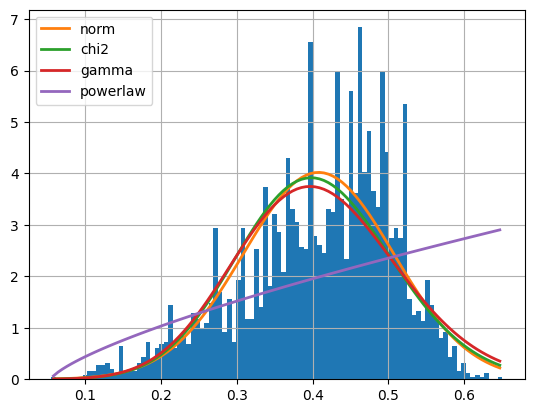

In [24]:
f.summary()

In [32]:
resultado = f.get_best(method="sumsquare_error")
resultado

{'norm': {'loc': 0.40788125448886764, 'scale': 0.09922798609936374}}

In [37]:
len(data["Diameter"])

4177

In [38]:
from scipy.stats import powerlaw
aux= powerlaw